In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore")

# supress tensorflow warnings
tf.get_logger().setLevel('ERROR')

In [1]:
categorical_features = ['Opposition','Venue']
numerical_features = ['Mins', 'BF', '4s', '6s','SR']
target_variable = 'Runs'

In [ ]:
data = pd.read_csv("mldata.csv")

def clean_data(data):
    # Clean 'Runs' column
    data['Runs'] = data['Runs'].str.replace("*", "").str.replace("T0", "0").astype(int)

    # Clean 'Opposition' column
    data['Opposition'] = data['Opposition'].str.replace('\xa0', ' ')

    # Handle missing values (if any)
    data.fillna(0, inplace=True)

    # Convert features to appropriate data types (if needed)
    data['Mins'] = data['Mins'].astype(int)
    data['BF'] = data['BF'].astype(int)
    data['4s'] = data['4s'].astype(int)
    data['6s'] = data['6s'].astype(int)

    data.drop_duplicates(inplace=True)

    return data



data = clean_data(data)






In [ ]:
# Calculate the count of data entries for each batsman
batsman_counts = data['Player'].value_counts()

# Get the batsman with the maximum count
batsman_with_max_count = batsman_counts.idxmax()
batsman_with_min_count = batsman_counts.idxmin()

# Filter the data for the batsman with the maximum count
max_batsman_records = data[data['Player'] == batsman_with_max_count]
min_batsman_records = data[data['Player'] == batsman_with_min_count]




# Preview the data
print("Total records of",batsman_with_max_count,"is", max_batsman_records.shape[0])
print("Total records of",batsman_with_min_count,"is", min_batsman_records.shape[0])

print("\nSince the lowest batsman data is only 1 , we will be replacing K Gowtham with HH Pandya\n")

kohliRecords = data[data['Player'] == "V Kohli"]
hardikRecords = data[data['Player'] == "HH Pandya"]

# So we will be testing model for V Kohli and HH Pandya
print("Total records of V Kohli","is", kohliRecords.shape[0])
print("Total records of HH Pandya","is", hardikRecords.shape[0])

print("\n\n")
print("Data shape of V Kohli\n")
print(kohliRecords.head().to_string().replace("\n", "\n\n"))

print("\n\n")
print("Data shape of HH Pandya\n")
print(hardikRecords.head().to_string().replace("\n", "\n\n"))

Total records of V Kohli is 120
Total records of K Gowtham is 1

Since the lowest batsman data is only 1 , we will be replacing K Gowtham with HH Pandya

Total records of V Kohli is 120
Total records of HH Pandya is 67



Data shape of V Kohli

     Player  Runs  Mins   BF  4s  6s     SR  Inns   Opposition     Ground Start Date Venue

3   V Kohli     9    24   16   0   0  56.25     1  v Australia  Melbourne  18-Jan-15  Away

14  V Kohli     4    13    8   0   0  50.00     1    v England   Brisbane  20-Jan-15  Away

25  V Kohli     3     8    9   0   0  33.33     1  v Australia     Sydney  26-Jan-15  Away

35  V Kohli     8    26   19   0   0  42.10     1    v England      Perth  30-Jan-15  Away

46  V Kohli   107   168  126   8   0  84.92     1   v Pakistan   Adelaide  15-Feb-15  Away



Data shape of HH Pandya

        Player  Runs  Mins  BF  4s  6s      SR  Inns     Opposition      Ground Start Date Venue

351  HH Pandya     0     0   0   0   0    0.00     2  v New Zealand  Dharamsal

In [ ]:
# create table of home score and away score of two batsman
def create_table(kohliRecords, hardikRecords):
  virat_home_records = kohliRecords[kohliRecords['Venue'] == 'Home']
  virat_away_records = kohliRecords[kohliRecords['Venue'] == 'Away']

  hardik_home_records = hardikRecords[hardikRecords['Venue'] == 'Home']
  hardik_away_records = hardikRecords[hardikRecords['Venue'] == 'Away']

  virat_home_records['Runs'] = virat_home_records['Runs'].astype(int)
  virat_away_records['Runs'] = virat_away_records['Runs'].astype(int)

  hardik_home_records['Runs'] = hardik_home_records['Runs'].astype(int)
  hardik_away_records['Runs'] = hardik_away_records['Runs'].astype(int)

  virat_home_low_score = virat_home_records['Runs'].min()
  virat_home_high_score = virat_home_records['Runs'].max()
  virat_away_low_score = virat_away_records['Runs'].min()
  virat_away_high_score = virat_away_records['Runs'].max()

  hardik_home_low_score = hardik_home_records['Runs'].min()
  hardik_home_high_score = hardik_home_records['Runs'].max()
  hardik_away_low_score = hardik_away_records['Runs'].min()
  hardik_away_high_score = hardik_away_records['Runs'].max()

  table_data = [
        ['Home', virat_home_low_score, virat_home_high_score, hardik_home_low_score, hardik_home_high_score],
        ['Away', virat_away_low_score, virat_away_high_score, hardik_away_low_score, hardik_away_high_score]
    ]
  table = pd.DataFrame(table_data, columns=['', f'V Kohli (Lowest)', f'V Kohli (Highest)', f'HH Pandya (Lowest)', f'HH Pandya (Highest)'])
  table_str = tabulate(table, headers='keys', tablefmt='fancy_grid')

  title = "Batsman run Records in Home and Away"
  table_str_with_title = f"\n\n{title}\n{table_str}"

  # Print the formatted table
  print(table_str_with_title)

create_table(kohliRecords, hardikRecords)




Batsman run Records in Home and Away
╒════╤══════╤════════════════════╤═════════════════════╤══════════════════════╤═══════════════════════╕
│    │      │   V Kohli (Lowest) │   V Kohli (Highest) │   HH Pandya (Lowest) │   HH Pandya (Highest) │
╞════╪══════╪════════════════════╪═════════════════════╪══════════════════════╪═══════════════════════╡
│  0 │ Home │                  0 │                 166 │                    0 │                    64 │
├────┼──────┼────────────────────┼─────────────────────┼──────────────────────┼───────────────────────┤
│  1 │ Away │                  0 │                 160 │                    0 │                    92 │
╘════╧══════╧════════════════════╧═════════════════════╧══════════════════════╧═══════════════════════╛




Correlation Matrix for V Kohli's Records
╒══════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╕
│      │     Mins │       BF │       4s │       6s │       SR │     Runs │
╞══════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ Mins │ 1        │ 0.693873 │ 0.490769 │ 0.449065 │ 0.292742 │ 0.662049 │
├──────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ BF   │ 0.693873 │ 1        │ 0.823045 │ 0.500257 │ 0.444959 │ 0.964005 │
├──────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ 4s   │ 0.490769 │ 0.823045 │ 1        │ 0.436761 │ 0.565796 │ 0.902639 │
├──────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ 6s   │ 0.449065 │ 0.500257 │ 0.436761 │ 1        │ 0.399687 │ 0.614175 │
├──────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ SR   │ 0.292742 │ 0.444959 │ 0.565796 │ 0.399687 │ 1        │ 0.545582 │
├──────┼──────────┼──────────┼──────────┼──────────┼─────

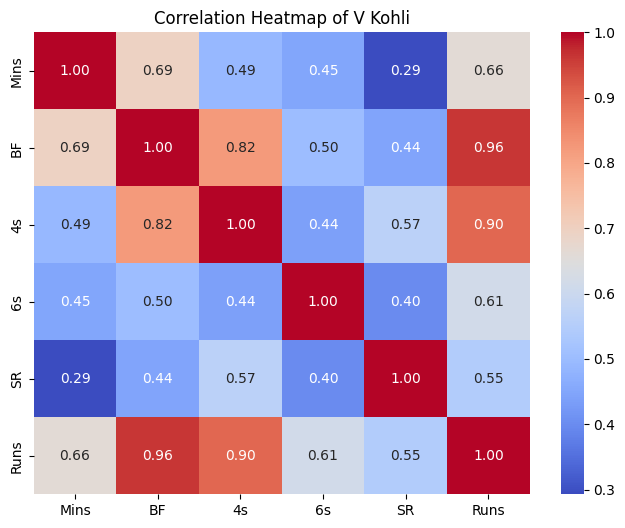

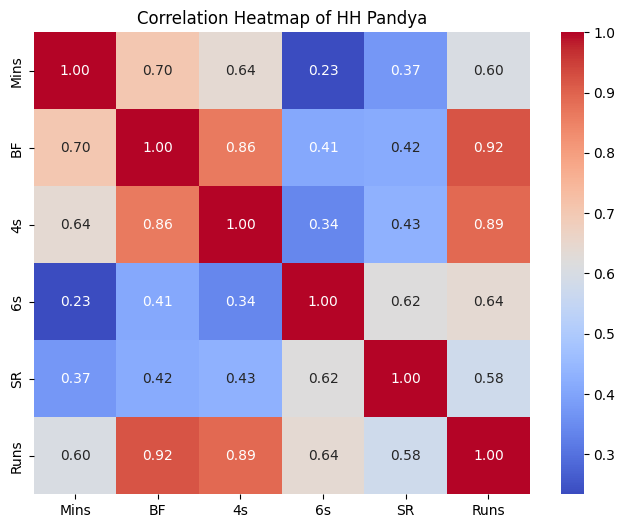

In [ ]:
# Correlation Matrix

def print_correlation_matrix(name, batsmanRecords):
  selected_features = categorical_features + numerical_features + [target_variable]
  batsman_subset = batsmanRecords[selected_features]

  # Calculate the correlation matrix
  corr_matrix = batsman_subset.corr()
  table_str = tabulate(corr_matrix, headers='keys', tablefmt='fancy_grid')
  title = f"Correlation Matrix for {name}'s Records"
  table_str_with_title = f"\n\n{title}\n{table_str}"
  print(table_str_with_title)
  plt.figure(figsize=(8, 6))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
  plt.title(f"Correlation Heatmap of {name}")


print_correlation_matrix("V Kohli",kohliRecords)
print_correlation_matrix("HH Pandya", hardikRecords)




P-value for the permutation test between V Kohli and HH Pandya haing default threshold of 0.05 : 0.0


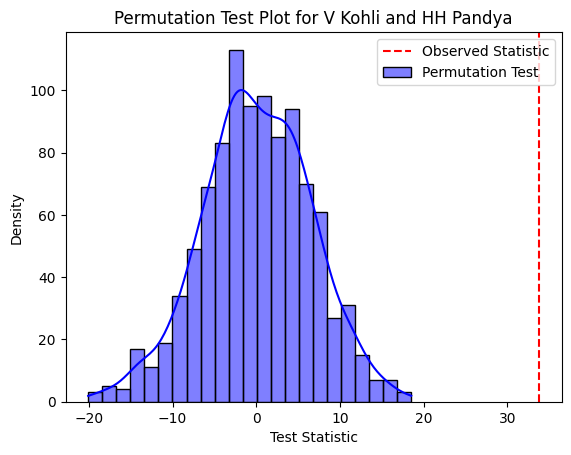

P-value for the permutation test between V Kohli and RG Sharma haing default threshold of 0.05 : 0.68


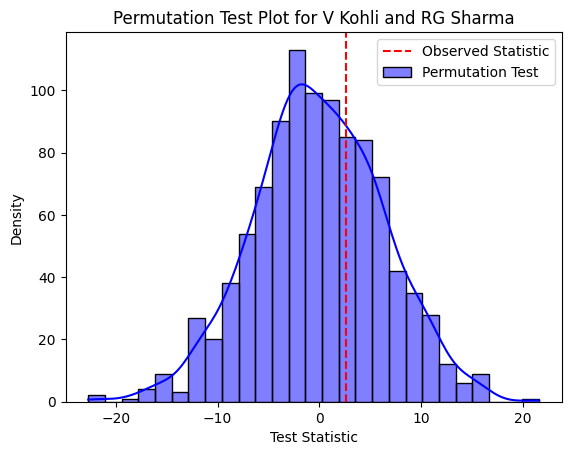

In [ ]:
#Permutation Test

def permutation_test(data, player1, player2, num_permutations=1000):
    player1_data = data[data['Player'] == player1]['Runs']
    player2_data = data[data['Player'] == player2]['Runs']

    observed_difference = np.mean(player1_data) - np.mean(player2_data)

    concatenated_data = np.concatenate([player1_data, player2_data])
    num_observed = len(player1_data)

    permuted_differences = []
    for _ in range(num_permutations):
        np.random.shuffle(concatenated_data)
        permuted_difference = np.mean(concatenated_data[:num_observed]) - np.mean(concatenated_data[num_observed:])
        permuted_differences.append(permuted_difference)

    p_value = (np.abs(permuted_differences) >= np.abs(observed_difference)).mean()
    print(f"P-value for the permutation test between {player1} and {player2} haing default threshold of 0.05 : {p_value}")

    test_statistics = permuted_differences
    sns.histplot(test_statistics, kde=True, color='blue', label='Permutation Test')
    plt.axvline(x=observed_difference, color='red', linestyle='dashed', label='Observed Statistic')
    plt.xlabel('Test Statistic')
    plt.ylabel('Density')
    plt.legend()
    plt.title(f'Permutation Test Plot for {player1} and {player2}')
    plt.show()


player1_name = 'V Kohli'
player2_name = 'HH Pandya'
permutation_test(data, player1_name, player2_name)

player1_name = 'V Kohli'
player2_name = 'RG Sharma'
permutation_test(data, player1_name, player2_name)



In [ ]:

def plot_graph_batsman(name,graphData):
  graphData['Runs'] = pd.to_numeric(graphData['Runs'], errors='coerce')

  # Histogram
  graphData['Runs'].plot.hist()
  plt.xlabel('Runs')
  plt.ylabel('Frequency')
  plt.title(f'Histogram of Runs of {name}')
  plt.show()

  # Box Plot
  sns.boxplot(x=graphData['Runs'])
  plt.xlabel('Runs')
  plt.title(f'Box Plot of Runs of {name}')
  plt.show()

  # Scatter Plot
  plt.scatter(graphData['BF'], graphData['Runs'])
  plt.xlabel('BF')
  plt.ylabel('Runs')
  plt.title(f'Scatter Plot of BF vs. Runs of {name}')
  plt.show()

  # Heatmap
  correlation_matrix = graphData[numerical_features].corr()
  sns.heatmap(correlation_matrix, annot=True)
  plt.title(f'Correlation Heatmap for {name}')
  plt.show()

  # Line Plot
  plt.plot(graphData['Start Date'], graphData['Runs'])
  plt.xlabel('Start Date')
  plt.ylabel('Runs')
  plt.title(f'Line Plot of Runs over Time of {name}')
  plt.xticks(rotation=45)
  plt.show()


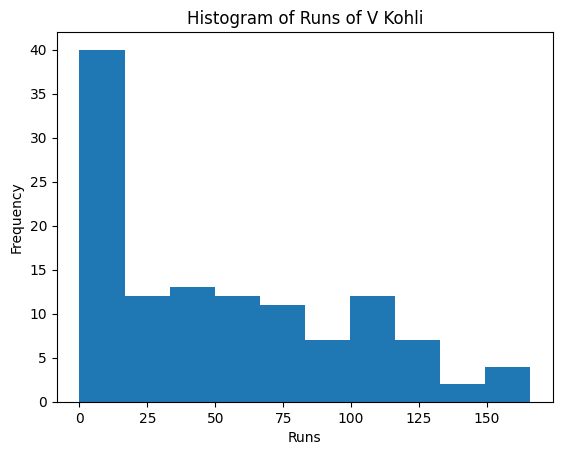

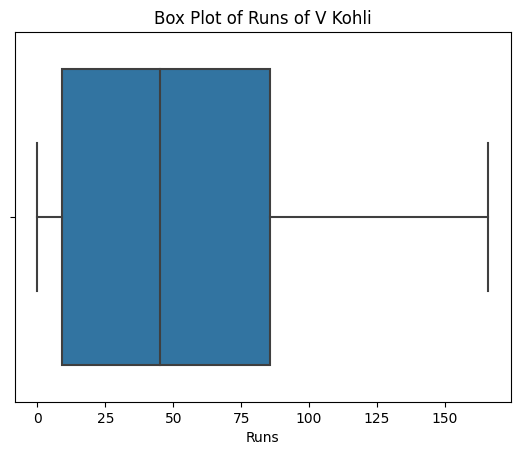

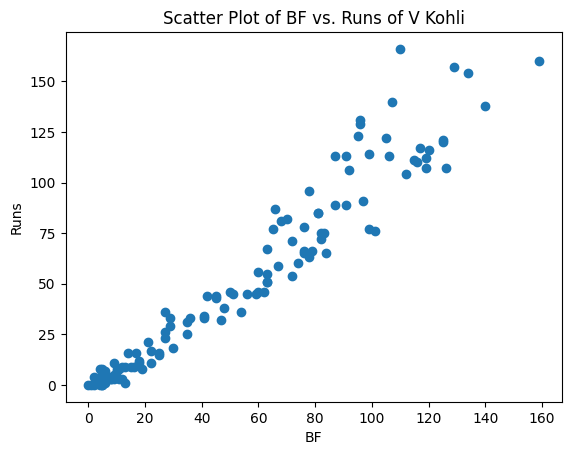

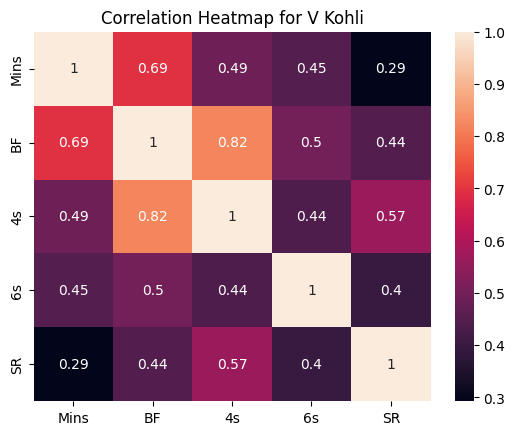

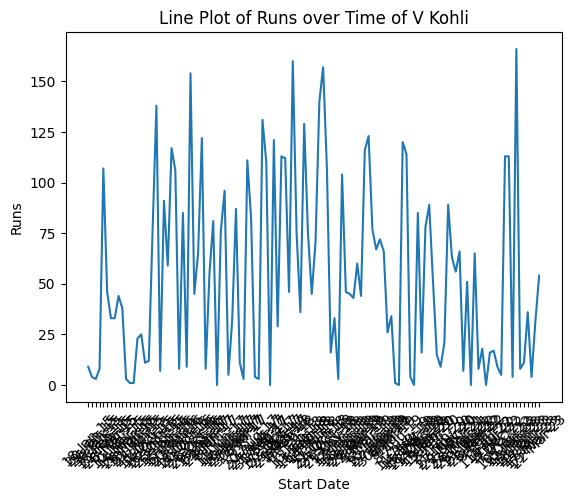

In [ ]:
# virat data graph
plot_graph_batsman("V Kohli", kohliRecords)

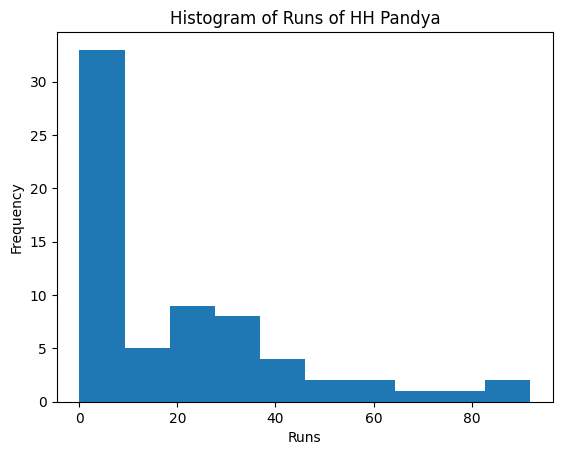

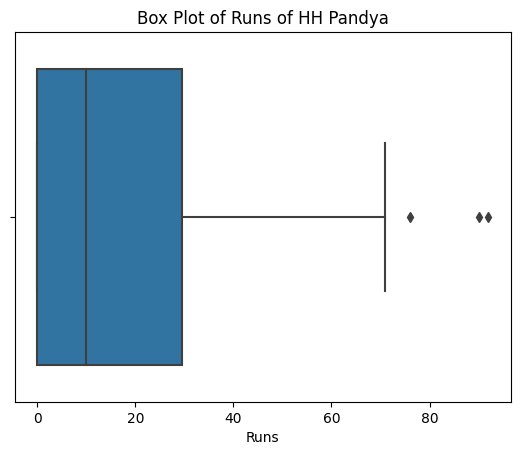

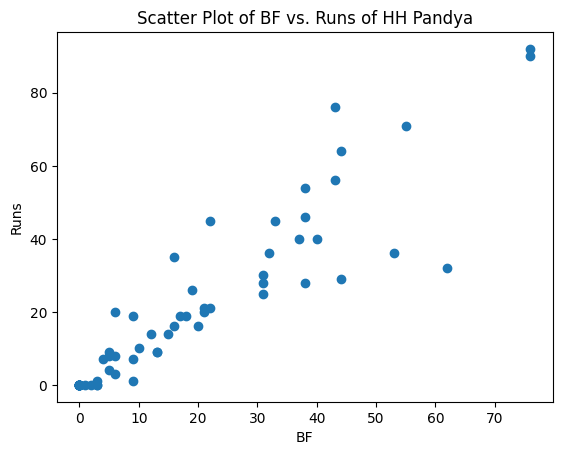

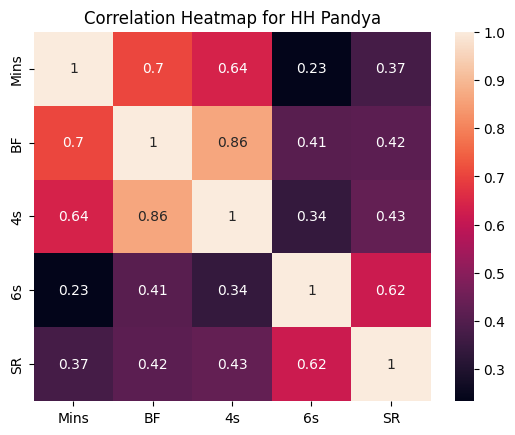

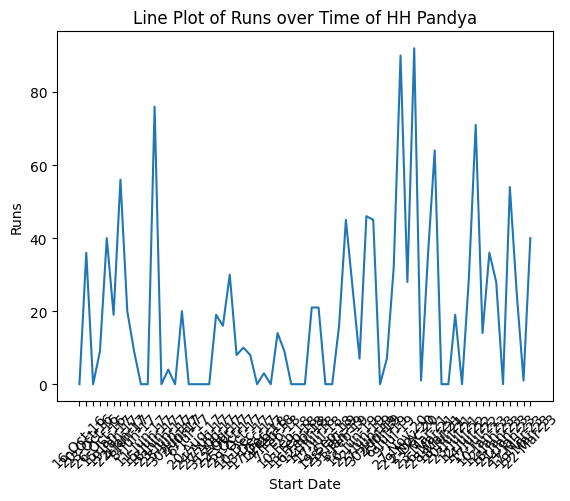

In [ ]:
#hardik data graph
plot_graph_batsman("HH Pandya", hardikRecords)

In [ ]:
# Convert categorical features to integer codes

dataKohli = kohliRecords
dataHardik = hardikRecords
for feature in categorical_features:
    dataKohli[feature] = dataKohli[feature].astype('category').cat.codes

for feature in categorical_features:
    dataHardik[feature] = dataHardik[feature].astype('category').cat.codes


In [ ]:
# Split the data into features (X) and target variable (y) for V Kohli
X_kohli = dataKohli[categorical_features + numerical_features ].values
y_kohli = dataKohli[target_variable].values

# Split the data into training and testing sets
X_train_kohli, X_test_kohli, y_train_kohli, y_test_kohli = train_test_split(X_kohli, y_kohli, test_size=0.2, random_state=42)

# Convert X_train_kohli and y_train_kohli to NumPy arrays if they are not already
X_train_kohli = np.array(X_train_kohli)
y_train_kohli = np.array(y_train_kohli)

y_test_kohli = np.array(y_test_kohli)

# If the data types are not compatible with TensorFlow, convert them
X_train_kohli = X_train_kohli.astype(np.float32)
y_train_kohli = y_train_kohli.astype(np.int32)
y_test_kohli = y_test_kohli.astype(np.int32)


print(X_train_kohli.shape, X_test_kohli.shape,y_train_kohli.shape, y_test_kohli.shape)

(96, 7) (24, 7) (96,) (24,)


In [ ]:
# Split the data into features (X) and target variable (y) for Hardik Pandya
X_hardik = dataHardik[categorical_features + numerical_features ].values
y_hardik = dataHardik[target_variable].values

# Split the data into training and testing sets
X_train_hardik, X_test_hardik, y_train_hardik, y_test_hardik = train_test_split(X_hardik, y_hardik, test_size=0.2, random_state=42)

# Convert X_train_hardik and y_train_hardik to NumPy arrays if they are not already
X_train_hardik = np.array(X_train_hardik)
y_train_hardik = np.array(y_train_hardik)

y_test_hardik = np.array(y_test_hardik)

# If the data types are not compatible with TensorFlow, convert them
X_train_hardik = X_train_hardik.astype(np.float32)
y_train_hardik = y_train_hardik.astype(np.int32)
y_test_hardik = y_test_hardik.astype(np.int32)

print(X_train_hardik.shape, X_test_hardik.shape,y_train_hardik.shape, y_test_hardik.shape)

(53, 7) (14, 7) (53,) (14,)




Feature ranking for V Kohli's Records
╒════════╤═══════════╤════════════╕
│   Rank │     Score │ Feature    │
╞════════╪═══════════╪════════════╡
│      0 │ 46.7957   │ BF         │
├────────┼───────────┼────────────┤
│      1 │ 36.6509   │ 4s         │
├────────┼───────────┼────────────┤
│      2 │  8.85642  │ 6s         │
├────────┼───────────┼────────────┤
│      3 │  7.78527  │ Mins       │
├────────┼───────────┼────────────┤
│      4 │  2.003    │ SR         │
├────────┼───────────┼────────────┤
│      5 │  1.14122  │ Opposition │
├────────┼───────────┼────────────┤
│      6 │  0.878242 │ Venue      │
╘════════╧═══════════╧════════════╛


Feature ranking for HH Pandya's Records
╒════════╤══════════╤════════════╕
│   Rank │    Score │ Feature    │
╞════════╪══════════╪════════════╡
│      0 │ 38.4175  │ BF         │
├────────┼──────────┼────────────┤
│      1 │ 19.7507  │ 4s         │
├────────┼──────────┼────────────┤
│      2 │ 16.6593  │ Mins       │
├────────┼──────────┼─────

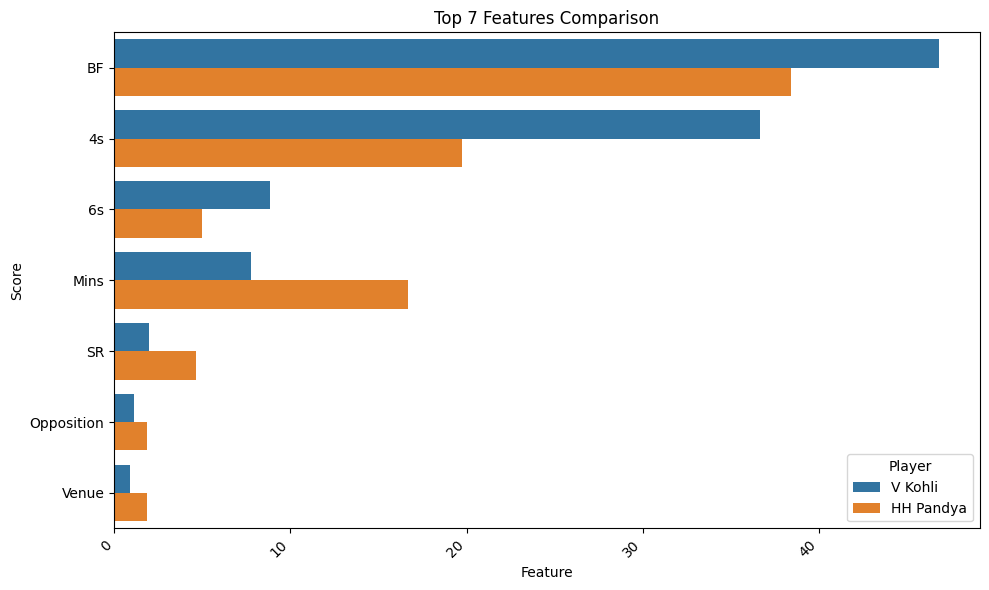

In [ ]:
## feature ranking

from sklearn.feature_selection import SelectKBest, f_classif

k = 7  # Number of top features to select

def rank_feature(name, X_train, y_train):

  selector = SelectKBest(score_func=f_classif, k=k)
  selector.fit(X_train, y_train)
  all_features = categorical_features + numerical_features

  feature_indices = selector.get_support(indices=True)

  # Get the names of the selected features from the combined list
  selected_features = [all_features[index] for index in feature_indices]

  feature_scores = selector.scores_

  feature_ranking = sorted(zip(feature_scores, selected_features), reverse=True)
  # Create a DataFrame for the feature ranking
  df_feature_ranking = pd.DataFrame(feature_ranking, columns=["Feature", "Score"])

  # Add a header for the table
  table_header = ["Rank", "Score", "Feature"]

  # Convert the DataFrame to a formatted table string using tabulate
  table_str = tabulate(df_feature_ranking.reset_index(drop=True), headers=table_header, tablefmt='fancy_grid')
  title = f"Feature ranking for {name}'s Records"
  table_str_with_title = f"\n\n{title}\n{table_str}"
  print(table_str_with_title)
  return df_feature_ranking


virat_feature_rank = rank_feature("V Kohli", X_train_kohli, y_train_kohli)
hardik_feature_rank = rank_feature("HH Pandya", X_train_hardik, y_train_hardik)

# Combine the feature rankings into a single DataFrame
df_combined_ranking = pd.concat([virat_feature_rank.assign(Player="V Kohli"), hardik_feature_rank.assign(Player="HH Pandya")])

# Plot the feature scores for both players using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Feature", y="Score", hue="Player", data=df_combined_ranking)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Score")
plt.title(f"Top {k} Features Comparison")
plt.tight_layout()
plt.show()



In [ ]:
## neural model

from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

def create_neural_model(X_train,X_test, y_train,y_test):
  # Convert X_train and y_train to NumPy arrays if they are not already
  X_train = np.array(X_train)
  y_train = np.array(y_train)

  y_test = np.array(y_test)

  # If the data types are not compatible with TensorFlow, convert them
  X_train = X_train.astype(np.float32)
  y_train = y_train.astype(np.int32)
  y_test = y_test.astype(np.int32)

  # Define the neural network model
  def create_model(units=100, epochs=10):
      model = Sequential()
      model.add(Dense(units, activation='relu', input_shape=(X_train.shape[1],)))
      model.add(Dense(1))  # Output layer for regression
      model.compile(optimizer='adam', loss='mean_squared_error')
      return model

  # Create a KerasRegressor wrapper
  model = KerasRegressor(build_fn=create_model, batch_size=32, verbose=0)

  # Define the hyperparameter grid for grid search
  param_grid = {
      'units': [50, 100, 200],
      'batch_size': [16,32, 64],
      'epochs': [5, 10, 15, 20, 50, 100]  # Specify the epochs values you want to include
  }

  # Define the scoring metric (mean squared error)
  scoring = make_scorer(mean_squared_error, greater_is_better=False)

  # Perform grid search with cross-validation
  grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring=scoring)
  grid_result = grid.fit(X_train, y_train)

  # Print the best parameters and best score
  print("Best Parameters: ", grid_result.best_params_)
  print("Best Score: ", grid_result.best_score_)

  # Get the best parameters from the grid search
  best_params = grid_result.best_params_

  # Create the model with the best parameters
  neural_model = create_model(units=best_params['units'])

  # Train the model
  neural_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

  # Make predictions on the test set
  y_pred = neural_model.predict(X_test)


  # Reshape predictions if necessary
  y_pred = y_pred.reshape(y_test.shape)

  # Calculate the R2 score
  r2 = r2_score(y_test, y_pred)

  # Print the best parameters, best score, and R2 score
  print("Best Parameters: ", best_params)
  print("Best Score: ", grid_result.best_score_)
  print("R2 score:", r2)


  # Evaluate the model
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)

  print("Root Mean Squared Error:", rmse)

  # Perform cross-validation
  k = 5  # Number of folds

  from sklearn.pipeline import make_pipeline
  from sklearn.model_selection import cross_val_score

  # Create a scikit-learn pipeline with KerasRegressor
  pipeline = make_pipeline(KerasRegressor(build_fn=create_model, batch_size=best_params['batch_size'],epochs=best_params['epochs'], verbose=0))

  # Perform cross-validation
  cv_scores = cross_val_score(pipeline, X_train, y_train, cv=k, scoring='r2')

  # Print the cross-validated R2 scores
  print("Cross-validated R2 scores:", cv_scores)

  # Print the mean and standard deviation of the cross-validated R2 scores
  print("Mean R2 score:", np.mean(cv_scores))
  print("Standard Deviation of R2 scores:", np.std(cv_scores))

  # 10 number of folds
  cv10_scores = cross_val_score(pipeline, X_train, y_train, cv=k, scoring='r2')
  return neural_model, cv_scores, cv10_scores

print("Neural Network - Virat Kohli")
virat_neural_model , virat_neural_cv5, virat_neural_cv10 = create_neural_model(X_train_kohli,X_test_kohli, y_train_kohli,y_test_kohli)
print('\n')
print("Neural Network - Hardik Pandya")
hardik_neural_model , hardik_neural_cv5, hardik_neural_cv10 = create_neural_model(X_train_hardik,X_test_hardik, y_train_hardik,y_test_hardik)


Neural Network - Virat Kohli
Best Parameters:  {'batch_size': 16, 'epochs': 100, 'units': 200}
Best Score:  -76.32551641542999
1/1 [==============================] - 0s 65ms/step
Best Parameters:  {'batch_size': 16, 'epochs': 100, 'units': 200}
Best Score:  -76.32551641542999
R2 score: 0.9848222688196386
Root Mean Squared Error: 5.9538587805743
Cross-validated R2 scores: [0.96830042 0.94815454 0.94737033 0.96975109 0.96324241]
Mean R2 score: 0.959363757331983
Standard Deviation of R2 scores: 0.009718985403821651


Neural Network - Hardik Pandya
Best Parameters:  {'batch_size': 16, 'epochs': 100, 'units': 200}
Best Score:  -59.29704278802631
1/1 [==============================] - 0s 53ms/step
Best Parameters:  {'batch_size': 16, 'epochs': 100, 'units': 200}
Best Score:  -59.29704278802631
R2 score: 0.9165242318133666
Root Mean Squared Error: 3.7535438271256614
Cross-validated R2 scores: [0.72823048 0.98958172 0.95653909 0.9550354  0.94684063]
Mean R2 score: 0.9152454656715069
Standard D

In [ ]:
#random forest

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

def create_randomForest_model(X_train,X_test, y_train,y_test):
  # Create an instance of the Random Forest model
  random_model = RandomForestRegressor(n_estimators=100,oob_score=True, random_state=42)

  # Perform k-fold cross-validation
  k = 5
  random5_cv_scores = cross_val_score(random_model, X_train, y_train, cv=k, scoring='r2')

  # Fit the model on the training data
  random_model.fit(X_train, y_train)

  # Make predictions on the testing data
  predictions = random_model.predict(X_test)

  # Evaluate the model

  # Obtain the OOB score
  oob_score = random_model.oob_score_
  # Print the OOB score
  print("OOB score:", oob_score)

  mse = mean_squared_error(y_test, predictions)
  rmse = np.sqrt(mse)

  # Calculate R^2 score
  r2 = r2_score(y_test, predictions)

  # Print the cross-validated R^2 scores
  print("Cross-validated R^2 scores:", random5_cv_scores)

  # Print the mean and standard deviation of the cross-validated R^2 scores
  print("Mean R^2 score:", np.mean(random5_cv_scores))
  print("Standard Deviation of R^2 scores:", np.std(random5_cv_scores))

  # Print the R^2 score on the test set
  print("R^2 score on test set:", r2)

  # Print the Root Mean Squared Error
  print("Root Mean Squared Error:", rmse)

  # 10 number of folds
  random10_cv_scores = cross_val_score(random_model, X_train, y_train, cv=k, scoring='r2')

  return random_model, random5_cv_scores, random10_cv_scores



print("Random Forest - Virat Kohli")
virat_randomForest_model , virat_randomForest_cv5, virat_randomForest_cv10 = create_randomForest_model(X_train_kohli,X_test_kohli, y_train_kohli,y_test_kohli)
print("\n")
print("Random Forest - Hardik Pandya")
hardik_randomForest_model , hardik_randomForest_cv5, hardik_randomForest_cv10 = create_randomForest_model(X_train_hardik,X_test_hardik, y_train_hardik,y_test_hardik)




Random Forest - Virat Kohli
OOB score: 0.9624718347170491
Cross-validated R^2 scores: [0.94917832 0.93743554 0.94883716 0.98885157 0.97859699]
Mean R^2 score: 0.960579917972832
Standard Deviation of R^2 scores: 0.01963391112781174
R^2 score on test set: 0.9794316656755471
Root Mean Squared Error: 6.930980269774255


Random Forest - Hardik Pandya
OOB score: 0.891416840426908
Cross-validated R^2 scores: [0.89862362 0.9483134  0.89098881 0.87115273 0.82015617]
Mean R^2 score: 0.8858469468975587
Standard Deviation of R^2 scores: 0.04152815538038444
R^2 score on test set: 0.9281665124996221
Root Mean Squared Error: 3.4819678344292613


In [ ]:
#logisitic model

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Define the threshold
threshold = 30

def create_logistic_model(X_train,X_test, y_train,y_test):
  # Transform the target variable into binary labels
  y_train_binary = np.where(y_train > threshold, "GOOD", "BAD")
  y_test_binary = np.where(y_test > threshold, "GOOD", "BAD")

  # Encode the target variable into numeric labels
  y_train_encoded = label_encoder.fit_transform(y_train_binary)
  y_test_encoded = label_encoder.transform(y_test_binary)

  # Define the logistic regression model
  logistic_model = LogisticRegression()

  # Perform k-fold cross-validation
  k = 5
  logistic5_cv_scores = cross_val_score(logistic_model, X_train, y_train_encoded, cv=k, scoring='accuracy')

  param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
    }
  grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_train_binary)

  # Get the best hyperparameters from the tuning process
  logistic_model = grid_search.best_estimator_


  # Train the logistic regression model
  logistic_model.fit(X_train, y_train_encoded)

  # Print the best hyperparameters from the tuning process
  print("Best hyperparameters:", grid_search.best_params_)

  # Make predictions on the testing data
  predictions = logistic_model.predict(X_test)


  # Decode the numeric labels into original labels
  predictions_labels = label_encoder.inverse_transform(predictions)

  # Calculate accuracy, precision, recall, and F1 score
  accuracy = accuracy_score(y_test_binary, predictions_labels)
  precision = precision_score(y_test_binary, predictions_labels, pos_label="GOOD")
  recall = recall_score(y_test_binary, predictions_labels, pos_label="GOOD")
  f1 = f1_score(y_test_binary, predictions_labels, pos_label="GOOD")

  # Print the cross-validated accuracy scores
  print("Cross-validated accuracy scores:", logistic5_cv_scores)

  # Print the mean and standard deviation of the cross-validated accuracy scores
  print("Mean accuracy score:", np.mean(logistic5_cv_scores))
  print("Standard Deviation of accuracy scores:", np.std(logistic5_cv_scores))

  # Print the accuracy, precision, recall, and F1 score
  print("Accuracy score:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 score:", f1)

  # 10 number of folds
  logistic10_cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=k, scoring='r2')

  return logistic_model, logistic5_cv_scores, logistic10_cv_scores

print("Logistic Model - Virat Kohli")
virat_logistic_model , virat_logistic_cv5, virat_logistic_cv10 = create_logistic_model(X_train_kohli,X_test_kohli, y_train_kohli,y_test_kohli)
print("\n")
print("Logistic Model - Hardik Pandya")
hardik_logistic_model , hardik_logistic_cv5, hardik_logistic_cv10 = create_logistic_model(X_train_hardik,X_test_hardik, y_train_hardik,y_test_hardik)

Logistic Model - Virat Kohli
Best hyperparameters: {'C': 0.1, 'solver': 'lbfgs'}
Cross-validated accuracy scores: [1.         1.         0.94736842 1.         1.        ]
Mean accuracy score: 0.9894736842105264
Standard Deviation of accuracy scores: 0.02105263157894739
Accuracy score: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


Logistic Model - Hardik Pandya
Best hyperparameters: {'C': 0.01, 'solver': 'lbfgs'}
Cross-validated accuracy scores: [0.90909091 1.         1.         0.9        0.8       ]
Mean accuracy score: 0.9218181818181819
Standard Deviation of accuracy scores: 0.07443450723803169
Accuracy score: 0.9285714285714286
Precision: 0.5
Recall: 1.0
F1 score: 0.6666666666666666


In [ ]:
data = pd.read_csv("mldata.csv")

def clean_data(data):
    # Clean 'Runs' column
    data['Runs'] = data['Runs'].str.replace("*", "").str.replace("T0", "0").astype(int)

    # Clean 'Opposition' column
    data['Opposition'] = data['Opposition'].str.replace('\xa0', ' ')

    # Handle missing values (if any)
    data.fillna(0, inplace=True)

    # Convert features to appropriate data types (if needed)
    data['Mins'] = data['Mins'].astype(int)
    data['BF'] = data['BF'].astype(int)
    data['4s'] = data['4s'].astype(int)
    data['6s'] = data['6s'].astype(int)

    data.drop_duplicates(inplace=True)

    return data



demo = clean_data(data)


def performance_calc(name, opposition, ground, venue, playerData, neural_model, logistic_model, random_model):
  filtered_data = playerData[(playerData['Player'] == name)].tail(1)


  # Convert filtered_data columns to numeric types
  filtered_data['Mins'] = pd.to_numeric(filtered_data['Mins'])
  filtered_data['BF'] = pd.to_numeric(filtered_data['BF'])
  filtered_data['4s'] = pd.to_numeric(filtered_data['4s'])
  filtered_data['6s'] = pd.to_numeric(filtered_data['6s'])
  filtered_data['SR'] = pd.to_numeric(filtered_data['SR'])


  # Example input features for a specific batsman against an opponent
  input_features = pd.DataFrame({
      'Opposition': [opposition],
      'Mins': [filtered_data['Mins'].values[0]],
      'BF': [filtered_data['BF'].values[0]],
      '4s': [filtered_data['4s'].values[0]],
      '6s': [filtered_data['6s'].values[0]],
      'SR': [filtered_data['SR'].values[0]],
      'Venue':[venue]
  })

  # Convert categorical features to integer codes
  for feature in categorical_features:
      input_features[feature] = input_features[feature].astype('category').cat.codes

  # Convert input features to numpy array
  input_array = input_features.values

  # Make prediction using the trained model
  predicted_score_neural = neural_model.predict(input_array)


  # Make prediction using the logistic trained model
  predicted_score = logistic_model.predict(input_array)
  if predicted_score == 1:
    rslt = "GOOD"
  else:
    rslt = "BAD"


  # Make prediction using the Random Forest trained model
  predicted_score_random_forest = random_model.predict(input_array)

  return predicted_score_neural, rslt, predicted_score_random_forest


# prediction for next match against Australia in Chennai
player_name1 = 'V Kohli'
opposition1 = 'v Australia'
ground1 = 'Chennai'
venue1 = 'Home'

virat_neural_output , virat_logistic_output, virat_random_output = performance_calc(player_name1, opposition1, ground1, venue1, demo, virat_neural_model, virat_logistic_model, virat_randomForest_model)

player_name2 = 'HH Pandya'
opposition2 = 'v Australia'
ground2 = 'Chennai'
venue2 = 'Home'

hardik_neural_output , hardik_logistic_output, hardik_random_output = performance_calc(player_name2, opposition2, ground2, venue2, demo, hardik_neural_model, hardik_logistic_model, hardik_randomForest_model)



from tabulate import tabulate

def final_output(name,random_output,randomForest_cv5,logistic_output,logistic_cv5,neural_output,neural_cv5):
  # Define the data for the table for Virat Kohli
  data = [
      ["Random Forest", random_output, np.mean(randomForest_cv5)],
      ["Logistic Regression", logistic_output, np.mean(logistic_cv5)],
      ["Neural Network", neural_output, np.mean(neural_cv5)],
  ]

  # Define the title for the table
  title = f"Model Comparison For {name}"

  # Define the headers for the table
  headers = ["Model", "Predictions", "Average CV Score for 5 Folds"]


  # Generate the table using the tabulate function
  table = tabulate(data, headers, tablefmt="fancy_grid", numalign="center")

  # Add the title to the table
  table_with_title = f"\n{title}\n{table}"


  # Print the table
  print(table_with_title)

final_output("V Kohli",virat_random_output,virat_randomForest_cv5,virat_logistic_output,virat_logistic_cv5,virat_neural_output,virat_neural_cv5)

final_output("HH Pandya",hardik_random_output,hardik_randomForest_cv5,hardik_logistic_output,hardik_logistic_cv5,hardik_neural_output,hardik_neural_cv5)

1/1 [==============================] - 0s 16ms/step

Model Comparison For V Kohli
╒═════════════════════╤═══════════════╤════════════════════════════════╕
│ Model               │ Predictions   │  Average CV Score for 5 Folds  │
╞═════════════════════╪═══════════════╪════════════════════════════════╡
│ Random Forest       │ [2.71]        │            0.96058             │
├─────────────────────┼───────────────┼────────────────────────────────┤
│ Logistic Regression │ BAD           │            0.989474            │
├─────────────────────┼───────────────┼────────────────────────────────┤
│ Neural Network      │ [[211.48914]] │            0.95606             │
╘═════════════════════╧═══════════════╧════════════════════════════════╛

Model Comparison For HH Pandya
╒═════════════════════╤═══════════════╤════════════════════════════════╕
│ Model               │ Predictions   │  Average CV Score for 5 Folds  │
╞═════════════════════╪═══════════════╪════════════════════════════════╡
│ Random F